In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

df = pd.read_csv("M5_World_Championship.csv")
df.head()


,Index,Hero,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,...,RS_Loses,RS_WinRate,T_Banned,T_BansPercentage,T_PicksBans,T_PicksBansPercentage,Played By,Played With,Played Vs.,Roles
0,1,Valentina,727,334,393,45.94%,52.00%,348,157,191,...,202,46.70%,484,34.62%,1211,86.62%,19 (11-8)19 (10-9)19 (10-9)19 (7-12)17 (8-9),164 (83-81) 162 (79-83) 140 (71-69) 121 (58-6...,218 (85-133) 178 (68-110) 174 (77-97) 173 (82...,Mage
1,2,Fredrinn,726,383,343,52.75%,51.93%,361,184,177,...,166,54.52%,475,33.98%,1201,85.91%,21 (15-6)18 (14-4)18 (12-6)18 (9-9)17 (10-7),164 (83-81) 131 (81-50) 126 (69-57) 122 (69-5...,218 (133-85) 190 (106-84) 185 (79-106) 173 (8...,Support
2,3,Terizla,620,348,272,56.13%,44.35%,291,168,123,...,149,54.71%,435,31.12%,1055,75.46%,22 (12-10)18 (10-8)15 (9-6)14 (10-4)14 (8-6),162 (79-83) 114 (76-38) 108 (56-52) 105 (49-5...,185 (106-79) 178 (110-68) 132 (70-62) 119 (65...,Fighter
3,4,Edith,527,265,262,50.28%,37.70%,258,125,133,...,129,52.04%,477,34.12%,1004,71.82%,14 (9-5)14 (9-5)14 (6-8)13 (10-3)13 (9-4),122 (69-53) 112 (48-64) 109 (55-54) 100 (42-5...,174 (97-77) 147 (76-71) 132 (62-70) 108 (51-5...,Tank
4,5,Irithel,502,255,247,50.80%,35.91%,245,129,116,...,131,49.03%,208,14.88%,710,50.79%,16 (8-8)15 (10-5)15 (10-5)12 (7-5)12 (7-5),140 (71-69) 126 (69-57) 108 (56-52) 100 (42-5...,145 (73-72) 132 (60-72) 120 (68-52) 110 (47-6...,Marksman


In [29]:
percentage_columns = [
    'T_WinRate', 'T_PickPercentage', 'BS_WinRate', 
    'RS_WinRate', 'T_BansPercentage', 'T_PicksBansPercentage'
]

# Clean invalid values and convert to float
for col in percentage_columns:
    df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].str.replace('%', '', regex=True).astype(float)

# Drop rows with missing data
df_cleaned = df.dropna()
print("Cleaned dataset length:", len(df_cleaned))
df_cleaned.head()


Cleaned dataset length: 102


,Index,Hero,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,...,RS_Loses,RS_WinRate,T_Banned,T_BansPercentage,T_PicksBans,T_PicksBansPercentage,Played By,Played With,Played Vs.,Roles
0,1,Valentina,727,334,393,45.94,52.00,348,157,191,...,202,46.70,484,34.62,1211,86.62,19 (11-8)19 (10-9)19 (10-9)19 (7-12)17 (8-9),164 (83-81) 162 (79-83) 140 (71-69) 121 (58-6...,218 (85-133) 178 (68-110) 174 (77-97) 173 (82...,Mage
1,2,Fredrinn,726,383,343,52.75,51.93,361,184,177,...,166,54.52,475,33.98,1201,85.91,21 (15-6)18 (14-4)18 (12-6)18 (9-9)17 (10-7),164 (83-81) 131 (81-50) 126 (69-57) 122 (69-5...,218 (133-85) 190 (106-84) 185 (79-106) 173 (8...,Support
2,3,Terizla,620,348,272,56.13,44.35,291,168,123,...,149,54.71,435,31.12,1055,75.46,22 (12-10)18 (10-8)15 (9-6)14 (10-4)14 (8-6),162 (79-83) 114 (76-38) 108 (56-52) 105 (49-5...,185 (106-79) 178 (110-68) 132 (70-62) 119 (65...,Fighter
3,4,Edith,527,265,262,50.28,37.70,258,125,133,...,129,52.04,477,34.12,1004,71.82,14 (9-5)14 (9-5)14 (6-8)13 (10-3)13 (9-4),122 (69-53) 112 (48-64) 109 (55-54) 100 (42-5...,174 (97-77) 147 (76-71) 132 (62-70) 108 (51-5...,Tank
4,5,Irithel,502,255,247,50.80,35.91,245,129,116,...,131,49.03,208,14.88,710,50.79,16 (8-8)15 (10-5)15 (10-5)12 (7-5)12 (7-5),140 (71-69) 126 (69-57) 108 (56-52) 100 (42-5...,145 (73-72) 132 (60-72) 120 (68-52) 110 (47-6...,Marksman


In [30]:
print("Mean picks:", np.mean(df_cleaned['T_Picked']))
print("Median picks:", np.median(df_cleaned['T_Picked']))
print("Standard deviation:", np.std(df_cleaned['T_Picked']))
print("Max picks:", np.max(df_cleaned['T_Picked']))
print("Min picks:", np.min(df_cleaned['T_Picked']))


Mean picks: 136.88235294117646
Median picks: 66.5
Standard deviation: 169.21313246431328
Max picks: 727
Min picks: 2


In [31]:
correlation, p_value = pearsonr(df_cleaned['T_Picked'], df_cleaned['T_WinRate'])
print("Correlation coefficient:", correlation)
print("P-value:", p_value)


Correlation coefficient: 0.17797786732914106
P-value: 0.07350981896774775


In [32]:
X = sm.add_constant(df_cleaned['T_Picked'])
y = df_cleaned['T_WinRate']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              T_WinRate   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.271
Date:                Wed, 21 May 2025   Prob (F-statistic):             0.0735
Time:                        04:38:22   Log-Likelihood:                -420.03
No. Observations:                 102   AIC:                             844.1
Df Residuals:                     100   BIC:                             849.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.5018      1.912     23.276      0.0

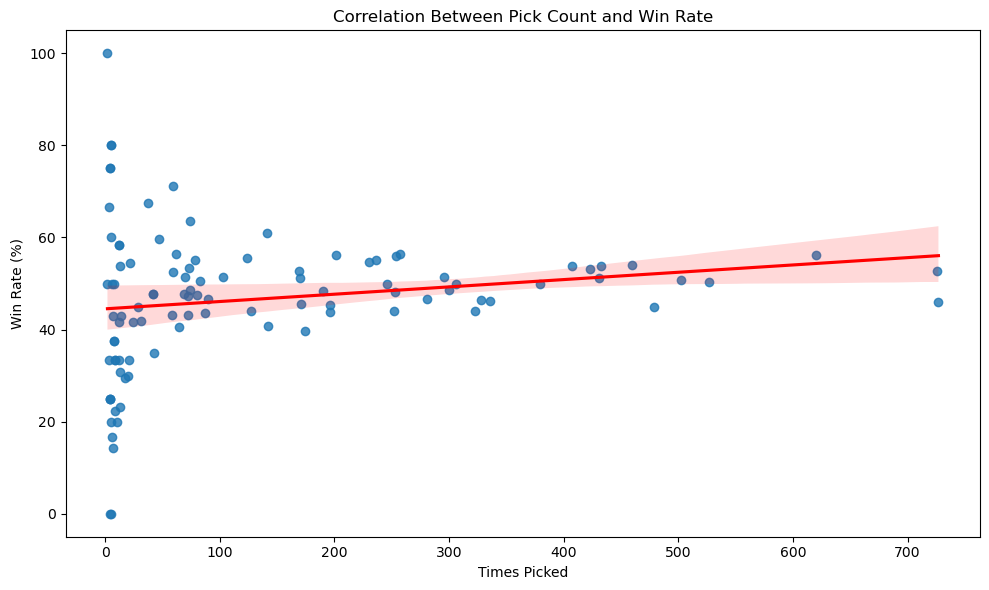

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='T_Picked', y='T_WinRate', data=df_cleaned, line_kws={"color": "red"})
plt.title('Correlation Between Pick Count and Win Rate')
plt.xlabel('Times Picked')
plt.ylabel('Win Rate (%)')
plt.tight_layout()
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23888\175247043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='T_Picked', y='Hero', data=top_picked, palette='Blues_d')


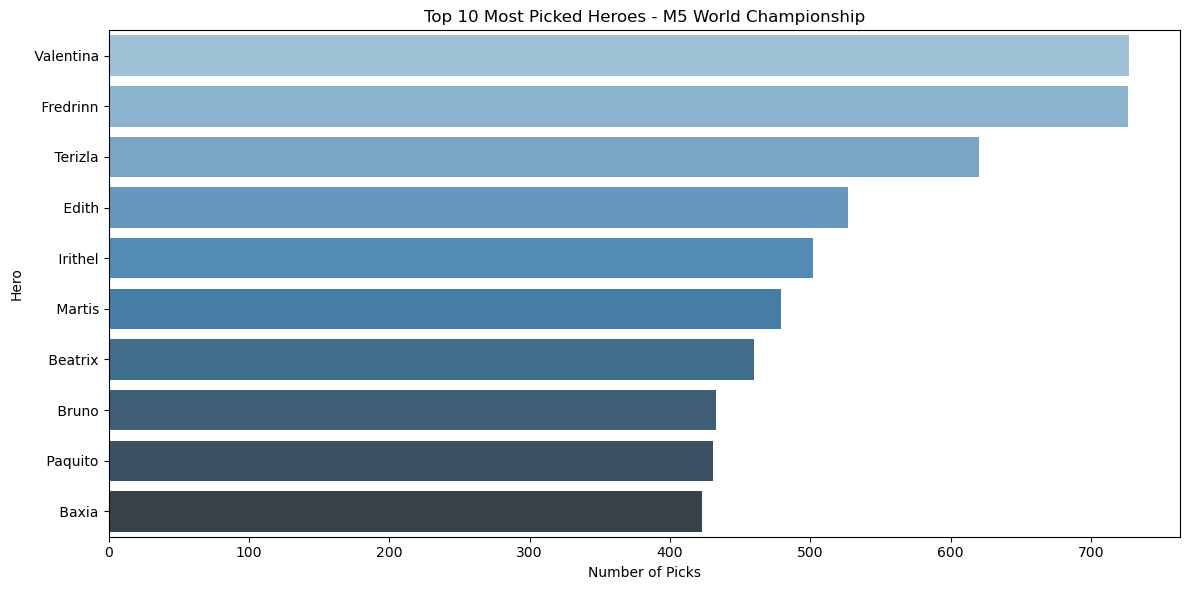

In [34]:
top_picked = df_cleaned.sort_values(by='T_Picked', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='T_Picked', y='Hero', data=top_picked, palette='Blues_d')
plt.title('Top 10 Most Picked Heroes - M5 World Championship')
plt.xlabel('Number of Picks')
plt.ylabel('Hero')
plt.tight_layout()
plt.show()


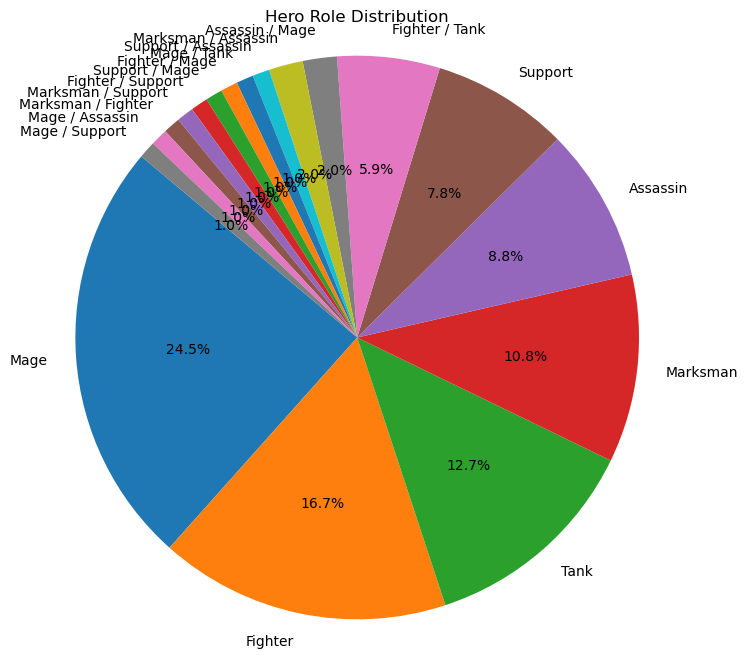

In [35]:
role_counts = df_cleaned['Roles'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hero Role Distribution')
plt.axis('equal')
plt.show()
